<div class="alert alert-block alert-success">
    
# FIT5196 Task 3 in Assessment 1
#### Student Name: Michael Xie
#### Student ID: 31842819

Date: 24/08/2024


Environment: Python 3.11.9

Libraries used:
* xxxxx
* xxxxx
    
</div>

<div class="alert alert-block alert-danger">
    
## Table of Contents

</div>    

[1. Introduction](#Intro) <br>
[2. Importing Libraries](#libs) <br>
[3. Examining Raw Data(given input file from task1)](#examine1) <br>
[4. Examining metadata](#examine2) <br>
[5. Data Analysis](#DA) <br>
    - [5.1 Question 1: How is xxxx related to xxxx?](#DI1) <br>
    - [5.2 Question 2: How does xxxxxx impact the rating of a business?](#DI2) <br>
[6. Summary](#summary) <br>
[7. References](#Ref) <br>

<div class="alert alert-block alert-warning">

## 1.  Introduction  <a class="anchor" name="Intro"></a>
    
</div>

xxxxxxxxxx

<div class="alert alert-block alert-warning">
    
## 2.  Importing Libraries  <a class="anchor" name="libs"></a>
 </div> 

The packages to be used in this assessment are imported in the following. They are used to fulfill the following tasks:

* **re:** to define and use regular expressions
* **pandas:** ...
* ...

In [24]:
import re 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

<div class="alert alert-block alert-warning">

## 3.  Examining Raw Data(given input file from task1) <a class="anchor" name="examine1"></a>

 </div>

In [17]:
review_df = pd.read_excel(r"test3.xlsx")


In [18]:
review_df.columns

Index(['gmap_id', 'user_id', 'time', 'review_rating', 'review_text', 'if_pic',
       'pic_dim', 'if_response'],
      dtype='object')

In [19]:
review_df.dtypes

gmap_id          object
user_id          object
time             object
review_rating     int64
review_text      object
if_pic           object
pic_dim          object
if_response      object
dtype: object

In [47]:
review_df['time'] = pd.to_datetime(review_df['time'])

In [48]:
review_df.head()

,gmap_id,user_id,time,review_rating,review_text,if_pic,pic_dim,if_response,year,month
0,0x80c2b62d3ad1385f:0x134c0ae51a64e340,111879057746007898782,2019-02-07 18:49:08,4,"my ""expert foodie friends"" have been telling m...",N,[],N,2019,2019-02
1,0x80c2b62d3ad1385f:0x134c0ae51a64e340,101905598065020101585,2018-09-20 20:07:00,4,beautiful atmosphere. great food and amazing s...,N,[],N,2018,2018-09
2,0x80c2b62d3ad1385f:0x134c0ae51a64e340,107641378831752487602,2019-01-20 06:51:19,4,love how hidden this joint was in downtown los...,N,[],N,2019,2019-01
3,0x80c2b62d3ad1385f:0x134c0ae51a64e340,106296655996491216483,2019-01-21 06:14:42,5,one of my favorite spots for delicious seafood...,N,[],N,2019,2019-01
4,0x80c2b62d3ad1385f:0x134c0ae51a64e340,114797512876374566333,2019-02-12 00:16:22,5,seafood and the atmosphere here is quality. fo...,N,[],N,2019,2019-02


In [49]:
review_df.describe(include='all')

,gmap_id,user_id,time,review_rating,review_text,if_pic,pic_dim,if_response,year,month
count,36598,36598,36598,36598.000000,36575,36598,36598,36598,36598.000000,36598
unique,176,35715,NaN,NaN,19739,2,24,2,NaN,136
top,0x80dd31941bd88101:0x24ef065e89051282,116535190851168531218,NaN,NaN,none,N,[],N,NaN,2019-08
freq,1880,4,NaN,NaN,15438,34456,35724,32170,NaN,1044
mean,NaN,NaN,2019-03-21 02:03:16.971692288,4.364118,NaN,NaN,NaN,NaN,2018.732444,NaN
min,NaN,NaN,2008-02-05 13:00:44,1.000000,NaN,NaN,NaN,NaN,2008.000000,NaN
25%,NaN,NaN,2018-05-27 09:20:56.750000128,4.000000,NaN,NaN,NaN,NaN,2018.000000,NaN
50%,NaN,NaN,2019-05-12 12:32:01.500000,5.000000,NaN,NaN,NaN,NaN,2019.000000,NaN
75%,NaN,NaN,2020-03-06 05:35:07.750000128,5.000000,NaN,NaN,NaN,NaN,2020.000000,NaN
max,NaN,NaN,2021-08-25 16:57:30,5.000000,NaN,NaN,NaN,NaN,2021.000000,NaN


In [14]:
review_df['review_rating'].unique()

array([4, 5, 3, 2, 1], dtype=int64)

In [22]:
review_df.isnull().sum()

gmap_id           0
user_id           0
time              0
review_rating     0
review_text      23
if_pic            0
pic_dim           0
if_response       0
dtype: int64

### **2. Summarize Key Features and Variables:**

- **gmap_id**: Unique identifier for each business
- **user_id**: Unique identifier for each user
- **time**: Timestamp of when the review was submitted in format 'YYYY-MM-DD tt:hh:ss' - ranges from 2008 to 2021
- **review_rating**: Integer review rating between 1-5 
- **review_text**: Preprocessed body of review ('None' if no review text)
- **if_pic**: Boolean (Y/N) indicator for whether user has submitted pictures. 
- **pic_dim**: List of picture dimensions ('[]' if no picture)
- **if_response**: Boolean (Y/N) indicator showing if there was a response to the review from the business.


### **Visualisations:**

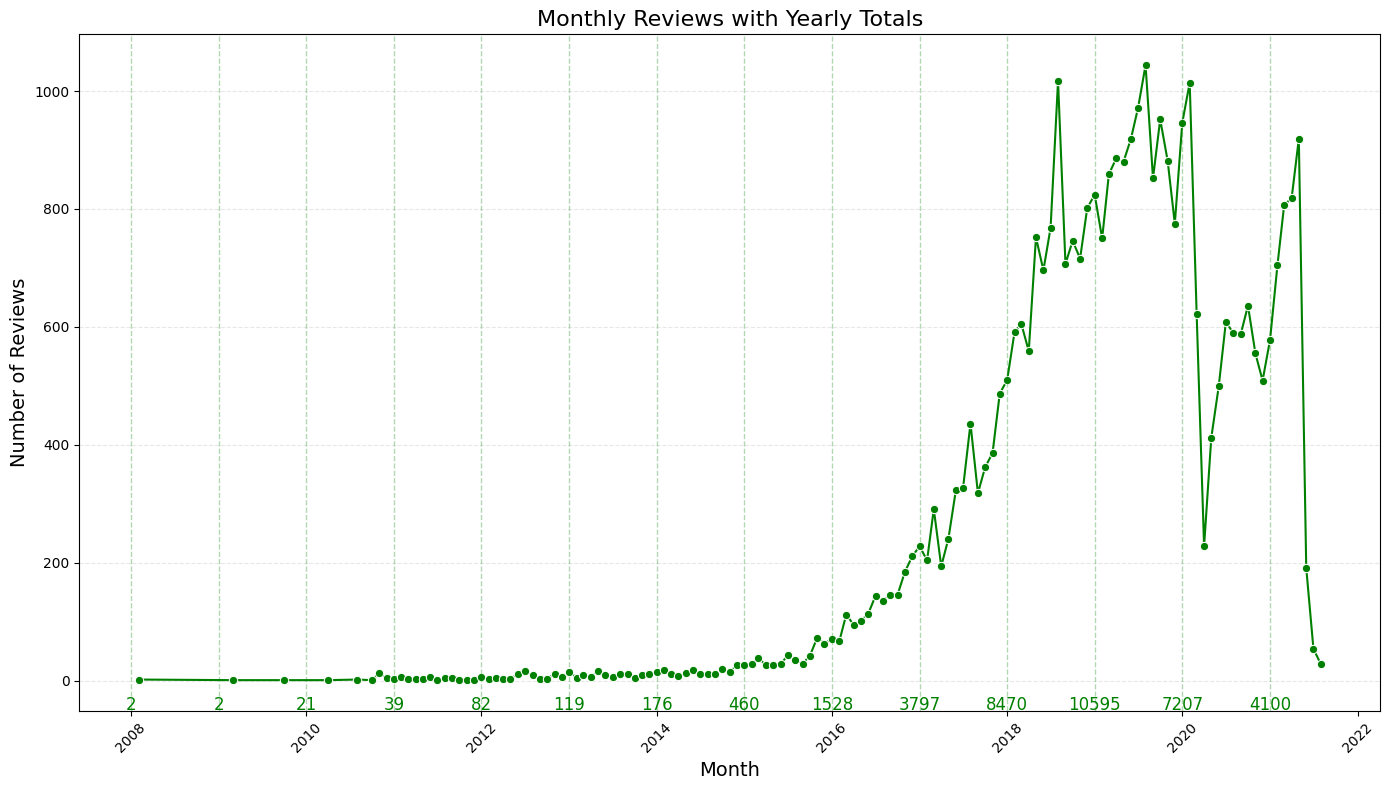

In [86]:

# Convert 'time' to datetime object 
review_df['time'] = pd.to_datetime(review_df['time'])

# Extract year and month and append as new columns 
review_df['year'] = review_df['time'].dt.year
review_df['month'] = review_df['time'].dt.to_period('M').astype(str)  

# Calculate monthly totals
monthly_totals = review_df.groupby('month').size().reset_index(name='total_reviews')
monthly_totals['month'] = pd.to_datetime(monthly_totals['month'], format='%Y-%m')

# Calculate yearly totals
yearly_totals = review_df.groupby('year').size().reset_index(name='total_reviews')
yearly_totals['year'] = yearly_totals['year'].astype(str)

# Line graph intialisation 
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_totals, x='month', y='total_reviews', marker='o', color='green')

# Add yearly total labels onto graph
for index, row in yearly_totals.iterrows():
    year_start_date = pd.to_datetime(f'{row["year"]}-01-01')
    plt.axvline(x=year_start_date, linestyle='--', color='green', linewidth=1, alpha=0.3)
    
    # Vertical position of labels
    y_pos = monthly_totals['total_reviews'].min() -50
    
    plt.text(year_start_date, y_pos, f'{row["total_reviews"]}', color='green', ha='center', fontsize=12)

plt.title('Monthly Reviews with Yearly Totals', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


C:\Users\micha\AppData\Local\Temp\ipykernel_20732\4244344231.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=review_df, x='review_rating', palette='mako')


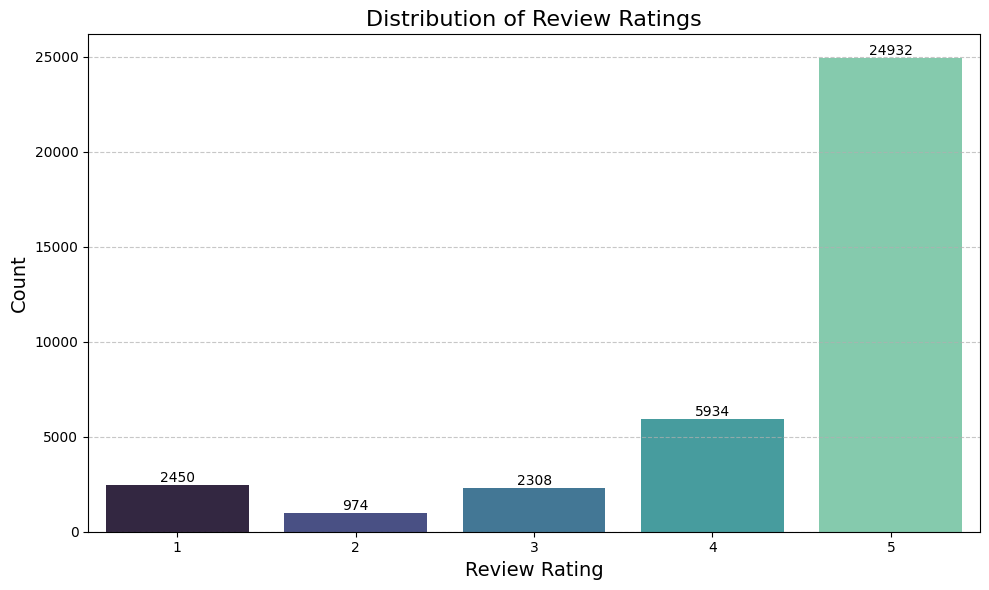

In [87]:
plt.figure(figsize=(10, 6))
# Bar graph which aggregates counts based on 'x' 
ax = sns.countplot(data=review_df, x='review_rating', palette='mako')

# Add labels 
for i in ax.containers:
    ax.bar_label(i,)

# https://www.geeksforgeeks.org/how-to-show-values-on-seaborn-barplot/

plt.title('Distribution of Review Ratings', fontsize=16)
plt.xlabel('Review Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [67]:
aggregated_review_df = review_df.groupby('gmap_id').agg(
    review_count=('gmap_id', 'size'),
    user_count = ('user_id', 'size'),
    time_count = ('time', 'median'),
    avg_rating = ('review_rating', 'mean'),
    review_text_count=('review_text', lambda x: (x != 'none').sum()),
    pic_count = ('if_pic', lambda x: (x == 'Y').sum()),
    response_count=('if_response', lambda x: (x == 'Y').sum()),

)

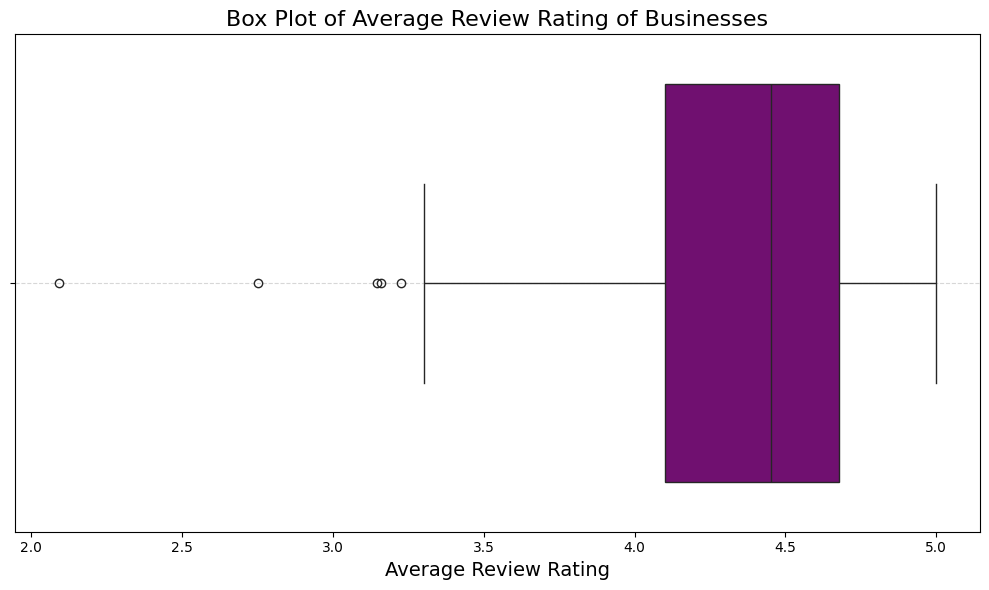

In [92]:
plt.figure(figsize=(10, 6))
# Boxplot for avg review ratings 
sns.boxplot(data=aggregated_review_df, x='avg_rating', color='purple')

# Customize the plot
plt.title('Box Plot of Average Review Rating of Businesses', fontsize=16)
plt.xlabel('Average Review Rating', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">

## 4.  Examining Metadata <a class="anchor" name="examine2"></a>

 </div>

In [51]:
meta_df = pd.read_json(r"meta-California.json", lines=True)
meta_df.head()

meta_df.to_excel("meta_data.xlsx", index=False)

Exception ignored in: <function ZipFile.__del__ at 0x00000249F2C06B60>
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\zipfile.py", line 1894, in __del__
    self.close()
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\zipfile.py", line 1911, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file


<div class="alert alert-block alert-warning">

## 5.  Data Analysis <a class="anchor" name="DA"></a>

 </div>

 In this section, we are looking into 5 data insights from the data. We believe that by looking into different factors that can impact on a business rating, we can have a better understanding on the importance of xxxxxxx.

 

<div class="alert alert-block alert-info">
    
### 5.1. How is xxxx related to xxxx? <a class="anchor" name="DI1"></a>

<div class="alert alert-block alert-info">
    
### 5.2. How does xxxxxx impact the rating of a business? <a class="anchor" name="DI1"></a>

<div class="alert alert-block alert-warning">

## 6.  Data Analysis <a class="anchor" name="summary"></a>

 </div>

Based on the analysis above, we investigate questions on:
........
Our findings are:
.......

These findings tell us:
.......

 

<div class="alert alert-block alert-warning"> 

## 7. References <a class="anchor" name="Ref"></a>

</div>